# Benchmarking

The following notebook contains benchmarking information for our implementation for calculating nonradiative recombination rates.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import timeit
from nonrad.nonrad import overlap_NM, analytic_overlap_NM, get_C

In [2]:
test_args = {
    'dQ': 2.008,
    'dE': 1.0102,
    'wi': 0.0306775211118,
    'wf': 0.0339920265573,
    'Wif': 0.00669174,
    'volume': 1.1e-21,
    'g': 1,
    'T': 300,
    'sigma': None,
    'overlap_method': 'analytic'
}

## Overlaps Implementation

The following section examines the implementation of computing nuclear wavefunction overlaps.

### Timing

In [3]:
%timeit overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], 1, 2)

281 µs ± 3.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [3]:
%timeit overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], 1, 2)

151 µs ± 45.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit analytic_overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], 1, 2)

57.6 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%timeit analytic_overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], 1, 2)

437 ns ± 8.89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
N = [1, 3, 11, 18, 38]
number, repeat = (250, 7)
print('+' + '-'*5 + '+' + '-'*5 + '+' + '-'*22 + '+' + '-'*22 + '+')
print('|   m |   n |            integrate |             analytic |')
print('+' + '-'*5 + '+' + '-'*5 + '+' + '-'*22 + '+' + '-'*22 + '+')
for m in N:
    for n in N:
        t = timeit.Timer(f"overlap_NM({test_args['dQ']}, {test_args['wi']}, {test_args['wf']}, {m}, {n})", 'from __main__ import overlap_NM')
        results0 = 1e6 * np.array(t.repeat(repeat, number)) / number
        t = timeit.Timer(f"analytic_overlap_NM({test_args['dQ']}, {test_args['wi']}, {test_args['wf']}, {m}, {n})", 'from __main__ import analytic_overlap_NM')
        results1 = 1e6 * np.array(t.repeat(repeat, number)) / number
        print(f'| {m: 3d} | {n: 3d} | ({np.mean(results0):7.01f} \u00B1 {np.std(results0):5.01f}) \u03BCs | ({np.mean(results1):7.01f} \u00B1 {np.std(results1):5.01f}) \u03BCs |')
print('+' + '-'*5 + '+' + '-'*5 + '+' + '-'*22 + '+' + '-'*22 + '+')

+-----+-----+----------------------+----------------------+
|   m |   n |            integrate |             analytic |
+-----+-----+----------------------+----------------------+
|   1 |   1 | (  126.0 ±  13.3) μs | (    0.3 ±   0.0) μs |
|   1 |   3 | (  133.5 ±   9.2) μs | (    0.4 ±   0.0) μs |
|   1 |  11 | (  176.6 ±   7.9) μs | (    0.6 ±   0.1) μs |
|   1 |  18 | (  223.9 ±  18.9) μs | (    0.9 ±   0.0) μs |
|   1 |  38 | (  312.5 ±  10.5) μs | (   10.7 ±   0.2) μs |
|   3 |   1 | (  136.4 ±  10.7) μs | (    0.3 ±   0.0) μs |
|   3 |   3 | (  142.0 ±   3.6) μs | (    0.4 ±   0.0) μs |
|   3 |  11 | (  184.2 ±  10.5) μs | (    0.9 ±   0.0) μs |
|   3 |  18 | (  218.3 ±   7.8) μs | (    1.4 ±   0.0) μs |
|   3 |  38 | (  318.3 ±  10.4) μs | (   20.3 ±   0.0) μs |
|  11 |   1 | (  174.3 ±   6.1) μs | (    0.5 ±   0.0) μs |
|  11 |   3 | (  184.3 ±   7.8) μs | (    0.8 ±   0.0) μs |
|  11 |  11 | (  221.1 ±   3.7) μs | (    2.1 ±   0.0) μs |
|  11 |  18 | (  259.2 ±   7.8) μs | (  

### Accuracy

In [7]:
Ni, Nf = (40, 40)
overlaps = np.zeros((Ni, Nf, 3))
for m in range(Ni):
    for n in range(Nf):
        overlaps[m, n, 0] = overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], m, n)
        overlaps[m, n, 1] = analytic_overlap_NM(test_args['dQ'], test_args['wi'], test_args['wf'], m, n)
        overlaps[m, n, 2] = np.abs(overlaps[m, n, 1] - overlaps[m, n, 0]) / np.abs(overlaps[m, n, 0])
        # print(m, n, overlaps[m, n, 0], overlaps[m, n, 1], overlaps[m, n, 2])

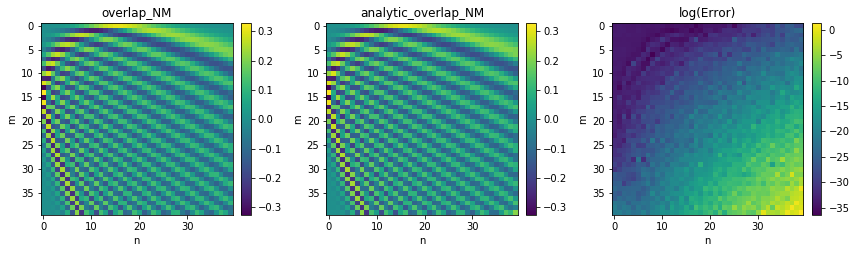

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
im0 = ax[0].imshow(overlaps[:, :, 0])
fig.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
ax[0].set_title('overlap_NM')
im1 = ax[1].imshow(overlaps[:, :, 1])
fig.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
ax[1].set_title('analytic_overlap_NM')
im2 = ax[2].imshow(np.log(overlaps[:, :, 2]))
fig.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
ax[2].set_title('log(Error)')
for a in ax:
    a.set_xlabel('n')
    a.set_ylabel('m')
plt.tight_layout()
plt.show()

## Capture Coefficient Implementation

The following section examines the implementation of the nonradiative capture coefficient and its various aspects such as smearing, overlap choice, etc.

### Timing

In [8]:
%timeit get_C(**test_args)

3.73 s ± 83.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit get_C(**test_args)

47.7 ms ± 434 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
targs = test_args.copy()
targs['sigma'] = 0.8*test_args['wf']

In [10]:
%timeit get_C(**targs)

3.69 s ± 54.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit get_C(**targs)

45.8 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Accuracy

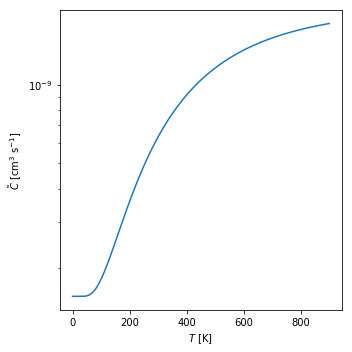

In [12]:
targs = test_args.copy()
targs['T'] = np.linspace(0.01, 900, 1000)

fig, ax = plt.subplots(figsize=(5, 5))
ax.semilogy(targs['T'], get_C(**targs))
ax.set_xlabel('$T$ [K]')
ax.set_ylabel(r'$\tilde{C}$ [cm$^{3}$ s$^{-1}$]')
plt.tight_layout()
plt.show()

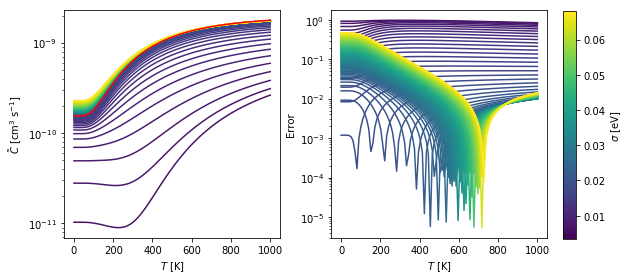

In [19]:
targs = test_args.copy()
targs['T'] = np.linspace(0.01, 1000, 100)
sigmas = targs['wf'] * np.linspace(0.1, 2., 100)
colors = plt.get_cmap('viridis')(sigmas / np.max(sigmas))

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
interpC = get_C(**targs)
ax[0].semilogy(targs['T'], interpC, color='r', zorder=100)
for sigma, color in zip(sigmas, colors):
    targs['sigma'] = sigma
    sigmaC = get_C(**targs)
    ax[0].semilogy(targs['T'], sigmaC, color=color)
    ax[1].semilogy(targs['T'], np.abs(sigmaC - interpC) / np.abs(interpC), color=color)
ax[0].set_xlabel('$T$ [K]')
ax[0].set_ylabel(r'$\tilde{C}$ [cm$^{3}$ s$^{-1}$]')
ax[1].set_xlabel('$T$ [K]')
ax[1].set_ylabel('Error')
plt.tight_layout()
plt.subplots_adjust(right=0.85)
cbarax = fig.add_axes([0.875, 0.155, 0.02, 0.79])
im = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=np.min(sigmas), vmax=np.max(sigmas)), cmap=plt.get_cmap('viridis'))
im.set_array([])
cbar = fig.colorbar(im, cax=cbarax)
cbar.set_label('$\sigma$ [eV]')
plt.show()